In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define o range de valores para x (suco de graviola)
x = np.linspace(0, 80, 400)  # Limite superior baseado nas restrições

# Calcula os valores de y diretamente das equações originais
y_upa = (480 - 8*x) / 4  # Rescreve 8x + 4y = 480 como y = (480 - 8x) / 4
y_upb = (200 - 6*x) / 2  # Rescreve 6x + 2y = 200 como y = (200 - 6x) / 2

# Plot das linhas de restrição
plt.figure(figsize=(10, 8))
plt.plot(x, y_upa, label='8x + 4y ≤ 480', color='blue')
plt.plot(x, y_upb, label='6x + 2y ≤ 200', color='green')

# Área factível
plt.fill_between(x, np.maximum(0, y_upb), np.minimum(y_upa, 120), where=(y_upa>=y_upb) & (x>=0) & (y_upa>=0) & (y_upb>=0), color='gray', alpha=0.5)

# Configurações do gráfico
plt.xlabel('Lotes de 10 litros de suco de graviola (x)')
plt.ylabel('Lotes de 10 litros de suco de caju (y)')
plt.title('Otimização da Produção de Sucos')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [23]:
import numpy as np
from scipy.optimize import linprog

# Coeficientes da função objetivo (margem de lucro)
c = [-7.50, -4.50]  # Maximize: -Z = -7.50x - 4.50y, linprog minimiza, então usamos o negativo

# Coeficientes das restrições de desigualdade
A = [
    [8, 4],  # UPA: 8x + 4y <= 480
    [6, 2]   # UPB: 6x + 2y <= 200
]
b = [480, 200]

# Limites para x e y (não-negatividade)
x_bounds = (0, None)
y_bounds = (0, None)

# Encontrar a solução ótima
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Resultados
x_optimal, y_optimal = result.x
max_profit = -result.fun  # Lucro máximo, convertendo de volta por causa do negativo usado

(x_optimal, y_optimal, max_profit)


(0.0, 100.0, 450.0)

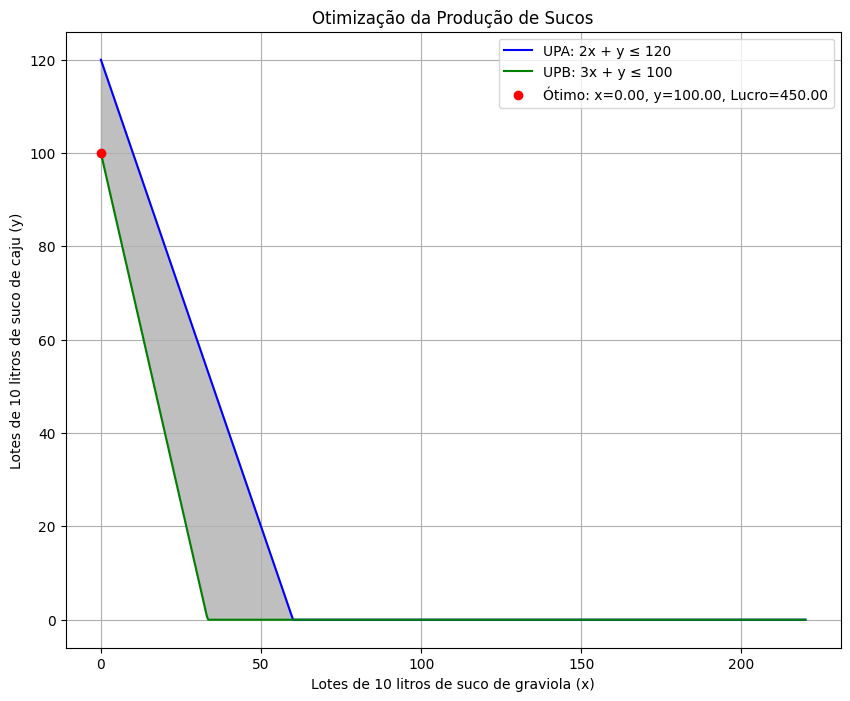

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o range de valores para x (lotes de suco de graviola)
x = np.linspace(0, 220, 500)  # Usando um limite superior razoável para x baseado nas restrições

# Calculando os valores de y para as restrições
y_upa = (480 - 8*x) / 4  # Rescreve 8x + 4y = 480 como y = (480 - 8x) / 4
y_upb = (200 - 6*x) / 2  # Rescreve 6x + 2y = 200 como y = (200 - 6x) / 2


# Encontrando o ponto ótimo (usando linprog para resolver novamente)
from scipy.optimize import linprog
c = [-7.50, -4.50]  # Coeficientes negativos para maximizar
A = [[8, 4], [6, 2]]  # Coeficientes das restrições
b = [480, 200]  # Limites das restrições
bounds = [(0, None), (0, None)]  # Lotes não podem ser negativos
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Pontos ótimos
x_optimal, y_optimal = result.x
max_profit = -result.fun

# Plotando as linhas de restrição
plt.figure(figsize=(10, 8))
plt.plot(x, np.maximum(0, y_upa), label='UPA: 2x + y ≤ 120', color='blue')
plt.plot(x, np.maximum(0, y_upb), label='UPB: 3x + y ≤ 100', color='green')

# Área factível
plt.fill_between(x, np.maximum(0, np.maximum(0, y_upb)), np.minimum(y_upa, 120), where=(y_upa>=y_upb) & (x<=60), color='gray', alpha=0.5)

# Marcando o ponto ótimo
plt.plot(x_optimal, y_optimal, 'ro', label=f'Ótimo: x={x_optimal:.2f}, y={y_optimal:.2f}, Lucro={max_profit:.2f}')

# Configurando o gráfico
plt.xlabel('Lotes de 10 litros de suco de graviola (x)')
plt.ylabel('Lotes de 10 litros de suco de caju (y)')
plt.title('Otimização da Produção de Sucos')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()
